# <span style="font-size: 150%;color:#783f04;background:#ffd966">Fabryka modeli MODELE WIELOKLASOWE [Titanic.txt]
    

### <span style="color:blue"> Cognition comes by comparison! Friedrich Wilhelm Nietzsche

In [1]:
def email(file, name):

    from email.mime.text import MIMEText
    from email.mime.multipart import MIMEMultipart
    import smtplib
    import mimetypes
    import email.mime.application

    smtp_ssl_host = 'smtp.gmail.com'  # smtp.mail.yahoo.com
    smtp_ssl_port = 465
    s = smtplib.SMTP_SSL(smtp_ssl_host, smtp_ssl_port)
    s.login('wtm695450085@gmail.com', 'Ewa183311')


    msg = MIMEMultipart()
    msg['Subject'] = file
    msg['From'] = 'wtm695450085@gmail.com'
    msg['To'] = 'wtm695450085@gmail.com'

    txt = MIMEText(name)
    msg.attach(txt)

    filename = file #path to file
    fo=open(filename,'rb')
    attach = email.mime.application.MIMEApplication(fo.read(),_subtype="pdf")
    fo.close()
    attach.add_header('Content-Disposition','attachment',filename=filename)
    msg.attach(attach)
    s.send_message(msg)
    s.quit()

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
from sklearn.ensemble import BaggingClassifier
from simple_colors import * 
from prettytable import PrettyTable

warnings.filterwarnings("ignore")

%matplotlib inline

# /home/wojciech/Pulpit/1/winequality.csv
# /home/wojciech/Pulpit/1/winequality-red.csv


df= pd.read_csv('/home/wojciech/Pulpit/2/Titanic.txt')
print(df.shape)
print()
print(df.columns)
df.head(3)

(891, 12)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


## <div class="alert-warning"> Uruchomić gdy model LGBM będzie się burzył!

In [3]:
import re
df = df.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

## <div class="alert-success">Sample reduction:</div>

In [4]:
df = df.sample(frac = 1.00, random_state=148) 
df.shape

(891, 12)

#### Start pomiaru czasu

In [5]:
import time
start_time = time.time() ## pomiar czasu: start pomiaru czasu
print(time.ctime())

Wed Jun 24 10:04:31 2020


### Tool for automatic coding of discrete variables !

In [6]:
a,b = df.shape     #<- ile mamy kolumn
b

print('DISCRETE FUNCTIONS CODED')
print('------------------------')
for i in range(1,b):
    i = df.columns[i]
    f = df[i].dtypes
    if f == np.object:
        print(i,"---",f)   
    
        if f == np.object:
        
            df[i] = pd.Categorical(df[i]).codes
        
            continue

DISCRETE FUNCTIONS CODED
------------------------
Name --- object
Sex --- object
Ticket --- object
Cabin --- object
Embarked --- object


In [7]:
df.fillna(7777, inplace=True)

## <div class="alert-success"> Ustawienie wartości wynikowej

In [8]:
target = 'Survived'

In [9]:
X = df.drop(target, axis=1) 
y = df[target]  

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123,stratify=y)

## Ustalamy strukturę próby 

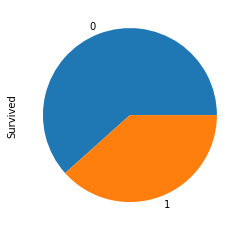

In [10]:
y.value_counts().plot(kind='pie')

In [11]:
y.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [12]:
y.unique()

array([0, 1])

## SMOTE (technika nadpróbkowania mniejszości syntetycznej)
## SMOTE (Synthetic Minority Over-sampling Technique)

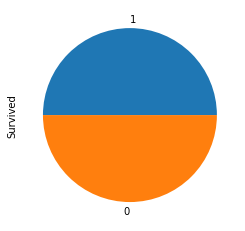

In [13]:
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler

smote = SMOTE('minority') 

ros = RandomOverSampler(random_state=148)
X_res, y_res = ros.fit_resample(X_test, y_test)
y_res.value_counts().plot(kind='pie')

In [14]:
print(X_train.shape, y_train.shape)

(712, 11) (712,)


In [15]:
print(X_res.shape, y_res.shape)

(220, 11) (220,)


In [16]:
X_train=X_res
y_train=y_res

In [17]:
print(X_train.shape, y_train.shape)

(220, 11) (220,)


In [18]:
y_train.value_counts()

1    110
0    110
Name: Survived, dtype: int64

## <span style="font-size: 150%;color:#783f04;background:#ffd966"> SMOTE pełne dla cross validation

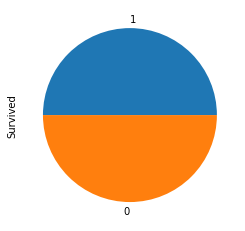

In [19]:
smote = SMOTE('minority') 

ros = RandomOverSampler(random_state=148)
Data, target = ros.fit_resample(X, y)
target.value_counts().plot(kind='pie')

In [20]:
target.value_counts()

1    549
0    549
Name: Survived, dtype: int64

## Adresowanie dla zestawów modeli

In [21]:
address1 ='/home/wojciech/Pulpit/8/model1-{0}.pkl'  #<=  modele na ustawieniach fabrycznych
address2 ='/home/wojciech/Pulpit/8/model2-{0}.pkl'  #<=  modele na ustawieniach fabrycznych po bagging
address3 ='/home/wojciech/Pulpit/8/model3-{0}.pkl'  #<=  modele na ustawieniach fabrycznych po kalibracji
address4 ='/home/wojciech/Pulpit/8/model4-{0}.pkl'  #<=  modele na ustawieniach fabrycznych po bagging po kalibracji
address5 ='/home/wojciech/Pulpit/8/model5-{0}.pkl'  #<=  modele na cross-validation
address6 ='/home/wojciech/Pulpit/8/model6-{0}.pkl'  #<=  modele na ustawieniach optymalnych po bagging
address7 ='/home/wojciech/Pulpit/8/model7-{0}.pkl'  ##<=  modele na ustawieniach optymalnych 
address8 ='/home/wojciech/Pulpit/8/model8-{0}.pkl'  ##<=  modele na ustawieniach optymalnych po boosting n=3
address9 ='/home/wojciech/Pulpit/8/model9-{0}.pkl'  ##<=  modele na ustawieniach optymalnych po boosting n=10
address10 ='/home/wojciech/Pulpit/8/model10-{0}.pkl'  ##<=  modele na ustawieniach optymalnych po kalibracji (method='isotonic')
address11 ='/home/wojciech/Pulpit/8/model11-{0}.pkl'  ##<=  modele na ustawieniach optymalnych po kalibracji (method='sigmoid')

### <span style="font-size: 110%;color:white;background:Red">Model 1 <span style="font-size: 110%;color:#6fa8dc;background:#cfe2f3">  Modele na ustawieniach fabrycznych
### <span style="font-size: 110%;color:white;background:Red">Model 2  <span style="font-size: 110%;color:#6fa8dc;background:#cfe2f3">  Modele na ustawieniach fabrycznych po bagging 


In [22]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from sklearn.svm import SVC 
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC 
import joblib
import time

NBC = GaussianNB()
LRE = LogisticRegression(solver='lbfgs')
GBC = GradientBoostingClassifier()
RFC = RandomForestClassifier()
LGBM = LGBMClassifier() 
CBC = CatBoostClassifier(verbose=0, n_estimators=100)
XGB = XGBClassifier()
LREN = LogisticRegression(solver='newton-cg')
KNN = KNeighborsClassifier(n_neighbors=1, p=2)
SVM = SVC(probability=True) 

print()
print('----Models without settings-----------------------------')
print()

classifiers_A = [SVM,CBC,XGB,LGBM,KNN,NBC,LRE,RFC,GBC]
nameA = ['SVM','CBC','XGB','LGBM','KNN','NBC','LRE','RFC','GBC']

for n,t in zip(nameA,classifiers_A):          ## Szkolenie modeli w pętli
    start_time = time.time()
    t.fit(X_train, y_train)
    filename1 =address1.format(n)  #<= zapisujemy model na dysku
    _ = joblib.dump(t, filename1, compress=9)
    #email(filename1,n)
    p = np.round((time.time() - start_time),decimals=1)
    print(blue(n),p,"---",time.ctime())


### Wzmacnianie przez bagowanie!

NBC_b = BaggingClassifier(base_estimator=NBC, n_estimators=10, max_samples=0.8, max_features=0.8)
LRE_b = BaggingClassifier(base_estimator=LRE, n_estimators=10, max_samples=0.8, max_features=0.8)
GBC_b = BaggingClassifier(base_estimator=GBC, n_estimators=10, max_samples=0.8, max_features=0.8)
RFC_b = BaggingClassifier(base_estimator=RFC, n_estimators=10, max_samples=0.8, max_features=0.8)
LGBM_b = BaggingClassifier(base_estimator=LGBM, n_estimators=10, max_samples=0.8, max_features=0.8)
CBC_b = BaggingClassifier(base_estimator=CBC, n_estimators=10, max_samples=0.8, max_features=0.8)
XGB_b = BaggingClassifier(base_estimator=XGB, n_estimators=10, max_samples=0.8, max_features=0.8)
SVM_b = BaggingClassifier(base_estimator=SVM, n_estimators=10, max_samples=0.8, max_features=0.8)
KNN_b = BaggingClassifier(base_estimator=KNN, n_estimators=10, max_samples=0.8, max_features=0.8)

nameB = ['SVM_b','CBC_b','XGB_b','LGBM_b','KNN_b','NBC_b','LRE_b','RFC_b','GBC_b']
classifiers_B = [SVM_b,CBC_b,XGB_b,LGBM_b,KNN_b,NBC_b,LRE_b,RFC_b,GBC_b]
print()
print('----Models without settings after bagging------------------')
print()
for n,t in zip(nameB,classifiers_B):
    start_time = time.time()
    #BaggingClassifier(base_estimator=t, n_estimators=10, max_samples=0.8, max_features=0.8) 
    t.fit(X_train, y_train)
    filename2 =address2.format(n)  #<= zapisujemy model na dysku
    _ = joblib.dump(t, filename2, compress=9) 
    #email(filename2,n)
    p = np.round((time.time() - start_time),decimals=1)
    print(blue(n),p,"---",time.ctime())
    


----Models without settings-----------------------------

SVM 0.0 --- Wed Jun 24 10:04:32 2020
CBC 0.3 --- Wed Jun 24 10:04:32 2020
XGB 0.1 --- Wed Jun 24 10:04:32 2020
LGBM 0.3 --- Wed Jun 24 10:04:33 2020
KNN 0.0 --- Wed Jun 24 10:04:33 2020
NBC 0.0 --- Wed Jun 24 10:04:33 2020
LRE 0.0 --- Wed Jun 24 10:04:33 2020
RFC 0.5 --- Wed Jun 24 10:04:33 2020
GBC 0.1 --- Wed Jun 24 10:04:33 2020

----Models without settings after bagging------------------

SVM_b 0.1 --- Wed Jun 24 10:04:34 2020
CBC_b 2.1 --- Wed Jun 24 10:04:36 2020
XGB_b 1.8 --- Wed Jun 24 10:04:37 2020
LGBM_b 2.4 --- Wed Jun 24 10:04:40 2020
KNN_b 0.2 --- Wed Jun 24 10:04:40 2020
NBC_b 0.0 --- Wed Jun 24 10:04:40 2020
LRE_b 0.3 --- Wed Jun 24 10:04:40 2020
RFC_b 4.0 --- Wed Jun 24 10:04:44 2020
GBC_b 1.1 --- Wed Jun 24 10:04:45 2020


### <span style="font-size: 110%;color:white;background:Red">Model 3  <span style="font-size: 110%;color:#6fa8dc;background:#cfe2f3">  Modele na ustawieniach fabrycznych po kalibracji

In [23]:
from sklearn.calibration import CalibratedClassifierCV, calibration_curve

SVM_c = CalibratedClassifierCV(SVM, method='sigmoid', cv=5)
CBC_c = CalibratedClassifierCV(CBC, method='sigmoid', cv=5)
XGB_c = CalibratedClassifierCV(XGB, method='sigmoid', cv=5)
LGBM_c = CalibratedClassifierCV(LGBM, method='sigmoid', cv=5)
KNN_c = CalibratedClassifierCV(KNN, method='sigmoid', cv=5)
NBC_c = CalibratedClassifierCV(NBC, method='sigmoid', cv=5)
LRE_c = CalibratedClassifierCV(LRE, method='sigmoid', cv=5)
RFC_c = CalibratedClassifierCV(RFC, method='sigmoid', cv=5)
GBC_c = CalibratedClassifierCV(GBC, method='sigmoid', cv=5)

classifiers_3 = [SVM_c,CBC_c,XGB_c,LGBM_c,KNN_c,NBC_c,LRE_c,RFC_c,GBC_c]
name3 = ['SVM_c','CBC_c','XGB_c','LGBM_c','KNN_c','NBC_c','LRE_c','RFC_c','GBC_c']

for n,t in zip(name3,classifiers_3):
    start_time = time.time()
    t.fit(X_train, y_train)
    filename3 =address3.format(n)  #<= zapisujemy model na dysku
    _ = joblib.dump(t, filename3, compress=9)
    #email(filename3,n)
    p = np.round((time.time() - start_time),decimals=1)
    print(green(n),p,"---",time.ctime())

SVM_c 0.1 --- Wed Jun 24 10:04:46 2020
CBC_c 0.9 --- Wed Jun 24 10:04:47 2020
XGB_c 0.7 --- Wed Jun 24 10:04:47 2020
LGBM_c 0.6 --- Wed Jun 24 10:04:48 2020
KNN_c 0.1 --- Wed Jun 24 10:04:48 2020
NBC_c 0.0 --- Wed Jun 24 10:04:48 2020
LRE_c 0.2 --- Wed Jun 24 10:04:48 2020
RFC_c 2.4 --- Wed Jun 24 10:04:51 2020
GBC_c 0.7 --- Wed Jun 24 10:04:51 2020


### <span style="font-size: 110%;color:white;background:Red">Model 4  <span style="font-size: 110%;color:#6fa8dc;background:#cfe2f3">  Modele na ustawieniach fabrycznych po bagging i po kalibracji

In [24]:
from sklearn.calibration import CalibratedClassifierCV, calibration_curve

SVM_d = CalibratedClassifierCV(SVM_c, method='sigmoid', cv=5)
CBC_d = CalibratedClassifierCV(CBC_c, method='sigmoid', cv=5)
XGB_d = CalibratedClassifierCV(XGB_c, method='sigmoid', cv=5)
LGBM_d = CalibratedClassifierCV(LGBM_c, method='sigmoid', cv=5)
KNN_d = CalibratedClassifierCV(KNN_c, method='sigmoid', cv=5)
NBC_d = CalibratedClassifierCV(NBC_c, method='sigmoid', cv=5)
LRE_d = CalibratedClassifierCV(LRE_c, method='sigmoid', cv=5)
RFC_d = CalibratedClassifierCV(RFC_c, method='sigmoid', cv=5)
GBC_d = CalibratedClassifierCV(GBC_c, method='sigmoid', cv=5)

classifiers_4 = [SVM_d,CBC_d,XGB_d,LGBM_d,KNN_d,NBC_d,LRE_d,RFC_d,GBC_d]
name4 = ['SVM_d','CBC_d','XGB_d','LGBM_d','KNN_d','NBC_d','LRE_d','RFC_d','GBC_d']

for n,t in zip(name4,classifiers_4):
    start_time = time.time()
    t.fit(X_train, y_train)
    filename4 =address4.format(n)  #<= zapisujemy model na dysku
    _ = joblib.dump(t, filename4, compress=9)
    #email(filename4,n)
    p = np.round((time.time() - start_time),decimals=1)
    print(green(n),p,"---",time.ctime())

SVM_d 0.4 --- Wed Jun 24 10:04:52 2020
CBC_d 4.3 --- Wed Jun 24 10:04:56 2020
XGB_d 4.1 --- Wed Jun 24 10:05:00 2020
LGBM_d 3.8 --- Wed Jun 24 10:05:04 2020
KNN_d 0.4 --- Wed Jun 24 10:05:04 2020
NBC_d 0.2 --- Wed Jun 24 10:05:04 2020
LRE_d 0.8 --- Wed Jun 24 10:05:05 2020
RFC_d 11.4 --- Wed Jun 24 10:05:17 2020
GBC_d 3.2 --- Wed Jun 24 10:05:20 2020


### <span style="font-size: 110%;color:white;background:Red">Model 5  <span style="font-size: 110%;color:#6fa8dc;background:#cfe2f3">  Modele na cross-validation

### <span style="color:blue">Zbiór hiperparametrów dla każdego modelu:

### <span style="color:blue">Wstawienie każdego modelu do sietki grid:

### <span style="color:blue">Ćwiczenie modelu z użyciem pełnego zakresu danych zbilansowanych (po oversample):

### <span style="color:blue">Sprawdzenie najlepszego zestawu hiperparametrów:

### <span style="font-size: 110%;color:white;background:Red">Model 7 <span style="font-size: 110%;color:#6fa8dc;background:#cfe2f3">  Modele na ustawieniach optymalnych

In [25]:
SVM_o = SVC(C= 0.1, gamma= 1, kernel= 'rbf', probability=True)
SVM2_o = SVC(C= 10, kernel= 'poly', probability=True)
CBC_o = CatBoostClassifier(verbose=0, n_estimators=100)
XGB_o = XGBClassifier(gamma= 0.0, learning_rate= 0.05, max_depth= 6)
LGBM_o = LogisticRegression(solver='newton-cg')
NBC_o = GaussianNB(var_smoothing= 1e-09)
LRE_o = LogisticRegression(solver='lbfgs',C= 1.0)
RFC_o = RandomForestClassifier(max_depth= 5, max_features= 'auto', min_samples_leaf= 1, min_samples_split= 2, n_estimators= 100)
RFC2_o = RandomForestClassifier(max_depth= 3, min_samples_leaf= 3, n_estimators= 500)

In [26]:
classifiers_O = [SVM_o,SVM2_o,CBC_o,XGB_o,LGBM_o,NBC_o,LRE_o,RFC_o,RFC2_o]
nameO = ['SVM_o','SVM2_o','CBC_o','XGB_o','LGBM_o','NBC_o','LRE_o','RFC_o','RFC2_o']

In [27]:
from sklearn.model_selection import GridSearchCV
import joblib

for n,t in zip(nameO,classifiers_O):          ## Szkolenie modeli w pętli
    start_time = time.time() 
    t.fit(X_train, y_train)
    filename7 =address7.format(n)  #<= zapisujemy model na dysku
    _ = joblib.dump(t, filename7, compress=9)
    #email(filename7,n)
    p = np.round((time.time() - start_time),decimals=1)
    print(blue(n),p,"---",time.ctime())


SVM_o 0.0 --- Wed Jun 24 10:05:20 2020
SVM2_o 0.0 --- Wed Jun 24 10:05:20 2020
CBC_o 0.2 --- Wed Jun 24 10:05:20 2020
XGB_o 0.2 --- Wed Jun 24 10:05:20 2020
LGBM_o 0.2 --- Wed Jun 24 10:05:21 2020
NBC_o 0.0 --- Wed Jun 24 10:05:21 2020
LRE_o 0.0 --- Wed Jun 24 10:05:21 2020
RFC_o 0.4 --- Wed Jun 24 10:05:21 2020
RFC2_o 1.5 --- Wed Jun 24 10:05:22 2020


### <span style="font-size: 110%;color:white;background:Red">Model 8 <span style="font-size: 110%;color:#6fa8dc;background:#cfe2f3">   Modele na ustawieniach optymalnych po boosting, n=3

In [28]:
from sklearn.ensemble import AdaBoostClassifier

SVM_v = AdaBoostClassifier(base_estimator=SVM_o,n_estimators=3) 
SVM2_v = AdaBoostClassifier(base_estimator=SVM2_o,n_estimators=3)
CBC_v = AdaBoostClassifier(base_estimator=CBC_o,n_estimators=3)
XGB_v = AdaBoostClassifier(base_estimator=XGB_o,n_estimators=3)
LGBM_v = AdaBoostClassifier(base_estimator=LGBM_o,n_estimators=3)
NBC_v = AdaBoostClassifier(base_estimator=NBC_o,n_estimators=3)
LRE_v = AdaBoostClassifier(base_estimator=LRE_o,n_estimators=3)
RFC_v = AdaBoostClassifier(base_estimator=RFC_o,n_estimators=3)
RFC2_v = AdaBoostClassifier(base_estimator=RFC2_o,n_estimators=3)

classifiers_8 = [SVM_v,SVM2_v,CBC_v,XGB_v,LGBM_v,NBC_v,LRE_v,RFC_v,RFC2_v]
name8 = ['SVM_v','SVM2_v','CBC_v','XGB_v','LGBM_v','NBC_v','LRE_v','RFC_v','RFC2_v']

for t,n in zip(classifiers_8,name8):   
        start_time = time.time() 
        t.fit(X_train, y_train)   
        filename8 =address8.format(n)  #<= zapisujemy model na dysku
        _ = joblib.dump(t, filename8, compress=9) 
        #email(filename8,n)
        p = np.round((time.time() - start_time),decimals=1)
        print(blue(n),p,"---",time.ctime())


SVM_v 0.1 --- Wed Jun 24 10:05:23 2020
SVM2_v 0.1 --- Wed Jun 24 10:05:23 2020
CBC_v 0.4 --- Wed Jun 24 10:05:23 2020
XGB_v 0.1 --- Wed Jun 24 10:05:23 2020
LGBM_v 0.1 --- Wed Jun 24 10:05:23 2020
NBC_v 0.0 --- Wed Jun 24 10:05:23 2020
LRE_v 0.1 --- Wed Jun 24 10:05:23 2020
RFC_v 1.2 --- Wed Jun 24 10:05:25 2020
RFC2_v 5.0 --- Wed Jun 24 10:05:30 2020


### <span style="font-size: 110%;color:white;background:Red">Model 9 <span style="font-size: 110%;color:#6fa8dc;background:#cfe2f3">   Modele na ustawieniach optymalnych po boosting, n=10

In [29]:

from sklearn.ensemble import AdaBoostClassifier

SVM_s = AdaBoostClassifier(base_estimator=SVM_o,n_estimators=10) 
SVM2_s = AdaBoostClassifier(base_estimator=SVM2_o,n_estimators=10)
CBC_s = AdaBoostClassifier(base_estimator=CBC_o,n_estimators=10)
XGB_s = AdaBoostClassifier(base_estimator=XGB_o,n_estimators=10)
LGBM_s = AdaBoostClassifier(base_estimator=LGBM_o,n_estimators=10)
NBC_s = AdaBoostClassifier(base_estimator=NBC_o,n_estimators=10)
LRE_s = AdaBoostClassifier(base_estimator=LRE_o,n_estimators=10)
RFC_s = AdaBoostClassifier(base_estimator=RFC_o,n_estimators=10)
RFC2_s = AdaBoostClassifier(base_estimator=RFC2_o,n_estimators=10)

classifiers_9 = [SVM_s,SVM2_s,CBC_s,XGB_s,LGBM_s,NBC_s,LRE_s,RFC_s,RFC2_s]
name9 = ['SVM_s','SVM2_s','CBC_s','XGB_s','LGBM_s','NBC_s','LRE_s','RFC_s','RFC2_s']


for t,n in zip(classifiers_9,name9):
        start_time = time.time() 
        t.fit(X_train, y_train)   
        filename9 =address9.format(n)  #<= zapisujemy model na dysku
        _ = joblib.dump(t, filename9, compress=9)
        #email(filename9,n)
        p = np.round((time.time() - start_time),decimals=1)
        print(blue(n),p,"---",time.ctime())

SVM_s 0.2 --- Wed Jun 24 10:05:30 2020
SVM2_s 0.2 --- Wed Jun 24 10:05:30 2020
CBC_s 0.4 --- Wed Jun 24 10:05:31 2020
XGB_s 0.5 --- Wed Jun 24 10:05:31 2020
LGBM_s 0.2 --- Wed Jun 24 10:05:31 2020
NBC_s 0.0 --- Wed Jun 24 10:05:31 2020
LRE_s 0.2 --- Wed Jun 24 10:05:31 2020
RFC_s 1.6 --- Wed Jun 24 10:05:33 2020
RFC2_s 12.4 --- Wed Jun 24 10:05:45 2020


### <span style="font-size: 110%;color:white;background:Red">Model 6 <span style="font-size: 110%;color:#6fa8dc;background:#cfe2f3"> Modele na ustawieniach optymalnych po bagging

In [30]:

SVM_w = BaggingClassifier(base_estimator=SVM_o, n_estimators=10, max_samples=0.8, max_features=0.8)
SVM2_w = BaggingClassifier(base_estimator=SVM2_o, n_estimators=10, max_samples=0.8, max_features=0.8)
CBC_w = BaggingClassifier(base_estimator=CBC_o, n_estimators=10, max_samples=0.8, max_features=0.8)
XGB_w = BaggingClassifier(base_estimator=XGB_o, n_estimators=10, max_samples=0.8, max_features=0.8)
LGBM_w = BaggingClassifier(base_estimator=LGBM_o, n_estimators=10, max_samples=0.8, max_features=0.8)
NBC_w = BaggingClassifier(base_estimator=NBC_o, n_estimators=10, max_samples=0.8, max_features=0.8)
LRE_w = BaggingClassifier(base_estimator=LRE_o, n_estimators=10, max_samples=0.8, max_features=0.8)
RFC_w = BaggingClassifier(base_estimator=RFC_o, n_estimators=10, max_samples=0.8, max_features=0.8)
RFC2_w = BaggingClassifier(base_estimator=RFC2_o, n_estimators=10, max_samples=0.8, max_features=0.8)

classifiers_6 = [SVM_w,SVM2_w,CBC_w,XGB_w,LGBM_w,NBC_w,LRE_w,RFC_w,RFC2_w]
name6 = ['SVM_w','SVM2_w','CBC_w','XGB_w','LGBM_w','NBC_w','LRE_w','RFC_w','RFC2_w']

for n,t in zip(name6,classifiers_6):          ## Szkolenie modeli w pętli
        t.fit(Data, target)
        filename6 =address6.format(n)  #<= zapisujemy model na dysku
        _ = joblib.dump(t, filename6, compress=9)
        #email(filename6,n)
        p = np.round((time.time() - start_time),decimals=1)
        print(blue(n),p,"---",time.ctime())

SVM_w 14.8 --- Wed Jun 24 10:05:48 2020
SVM2_w 16.5 --- Wed Jun 24 10:05:50 2020
CBC_w 20.2 --- Wed Jun 24 10:05:53 2020
XGB_w 23.4 --- Wed Jun 24 10:05:56 2020
LGBM_w 24.5 --- Wed Jun 24 10:05:58 2020
NBC_w 24.5 --- Wed Jun 24 10:05:58 2020
LRE_w 25.0 --- Wed Jun 24 10:05:58 2020
RFC_w 29.3 --- Wed Jun 24 10:06:02 2020
RFC2_w 45.5 --- Wed Jun 24 10:06:19 2020


### <span style="font-size: 110%;color:white;background:Red">Model 10  <span style="font-size: 110%;color:#6fa8dc;background:#cfe2f3">  Modele na ustawieniach optymalnych po kalibracji (method='isotonic')

In [31]:
from sklearn.calibration import CalibratedClassifierCV, calibration_curve

SVM_q = CalibratedClassifierCV(SVM_o, method='isotonic', cv=5)
SVM2_q = CalibratedClassifierCV(SVM2_o, method='isotonic', cv=5)
CBC_q = CalibratedClassifierCV(CBC_o, method='isotonic', cv=5)
XGB_q = CalibratedClassifierCV(XGB_o, method='isotonic', cv=5)
LGBM_q = CalibratedClassifierCV(LGBM_o, method='isotonic', cv=5)
NBC_q = CalibratedClassifierCV(NBC_o, method='isotonic', cv=5)
LRE_q = CalibratedClassifierCV(LRE_o, method='isotonic', cv=5)
RFC_q = CalibratedClassifierCV(RFC_o, method='isotonic', cv=5)
RFC2_q = CalibratedClassifierCV(RFC2_o, method='isotonic', cv=5)

classifiers_10 = [SVM_q,SVM2_q,CBC_q,XGB_q,LGBM_q,NBC_q,LRE_q,RFC_q,RFC2_q]
name10 = ['SVM_q','SVM2_q','CBC_q','XGB_q','LGBM_q','NBC_q','LRE_q','RFC_q','RFC2_q']

for n,t in zip(name10,classifiers_10):
    start_time = time.time()
    t.fit(X_train, y_train)
    filename10 =address10.format(n)  #<= zapisujemy model na dysku
    _ = joblib.dump(t, filename10, compress=9)
    #email(filename10,n)
    p = np.round((time.time() - start_time),decimals=1)
    print(green(n),p,"---",time.ctime())

SVM_q 0.2 --- Wed Jun 24 10:06:19 2020
SVM2_q 0.1 --- Wed Jun 24 10:06:19 2020
CBC_q 1.1 --- Wed Jun 24 10:06:20 2020
XGB_q 1.0 --- Wed Jun 24 10:06:21 2020
LGBM_q 0.6 --- Wed Jun 24 10:06:21 2020
NBC_q 0.0 --- Wed Jun 24 10:06:21 2020
LRE_q 0.2 --- Wed Jun 24 10:06:22 2020
RFC_q 2.0 --- Wed Jun 24 10:06:24 2020
RFC2_q 8.2 --- Wed Jun 24 10:06:32 2020


### <span style="font-size: 110%;color:white;background:Red">Model 11  <span style="font-size: 110%;color:#6fa8dc;background:#cfe2f3">  Modele na ustawieniach optymalnych po kalibracji (method='sigmoid')

In [32]:
from sklearn.calibration import CalibratedClassifierCV, calibration_curve

SVM_y = CalibratedClassifierCV(SVM_o, method='sigmoid', cv=5)
SVM2_y = CalibratedClassifierCV(SVM2_o, method='sigmoid', cv=5)
CBC_y = CalibratedClassifierCV(CBC_o, method='sigmoid', cv=5)
XGB_y = CalibratedClassifierCV(XGB_o, method='sigmoid', cv=5)
LGBM_y = CalibratedClassifierCV(LGBM_o, method='sigmoid', cv=5)
NBC_y = CalibratedClassifierCV(NBC_o, method='sigmoid', cv=5)
LRE_y = CalibratedClassifierCV(LRE_o, method='sigmoid', cv=5)
RFC_y = CalibratedClassifierCV(RFC_o, method='sigmoid', cv=5)
RFC2_y = CalibratedClassifierCV(RFC2_o, method='sigmoid', cv=5)

classifiers_11 = [SVM_y,SVM2_y,CBC_y,XGB_y,LGBM_y,NBC_y,LRE_y,RFC_y,RFC2_y]
name11 = ['SVM_y','SVM2_y','CBC_y','XGB_y','LGBM_y','NBC_y','LRE_y','RFC_y','RFC2_y']

for n,t in zip(name11,classifiers_11):
    start_time = time.time()
    t.fit(X_train, y_train)
    filename11 =address11.format(n)  #<= zapisujemy model na dysku
    _ = joblib.dump(t, filename11, compress=9)
    #email(filename11,n)
    p = np.round((time.time() - start_time),decimals=1)
    print(green(n),p,"---",time.ctime())

SVM_y 0.2 --- Wed Jun 24 10:06:32 2020
SVM2_y 0.1 --- Wed Jun 24 10:06:32 2020
CBC_y 0.9 --- Wed Jun 24 10:06:33 2020
XGB_y 1.2 --- Wed Jun 24 10:06:34 2020
LGBM_y 0.6 --- Wed Jun 24 10:06:35 2020
NBC_y 0.0 --- Wed Jun 24 10:06:35 2020
LRE_y 0.2 --- Wed Jun 24 10:06:35 2020
RFC_y 1.9 --- Wed Jun 24 10:06:37 2020
RFC2_y 8.3 --- Wed Jun 24 10:06:45 2020
